In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
#Cargamos la funcion generadora de datos
from numpy.typing import NDArray
def datos_prueba(t_max:float, dt:float, amplitudes:NDArray[float],
 frecuencias:NDArray[float], ruido:float=0.0) -> NDArray[float]:
 ts = np.arange(0.,t_max,dt)
 ys = np.zeros_like(ts,dtype=float)
 for A,f in zip(amplitudes,frecuencias):
  ys += A*np.sin(2*np.pi*f*ts)
  ys += np.random.normal(loc=0,size=len(ys),scale=ruido) if ruido else 0
 return ts,ys

In [9]:
#1.a) Implementamos la transformada explicita de fourier 
def Fourier(t, y, f:float) -> complex:
  F=0
  for i in range(len(t)):
    F += y[i]*np.exp(-2j*np.pi*f*t[i])
  return F

In [33]:
#Generamos los datos para dos señales, una con ruido y otra sin 
señal_sin_ruido = datos_prueba(15,0.1,[1,1.5,2],[1,.614,2.8])
señal_con_ruido = datos_prueba(15,0.1,[1,1.5,2],[1,.614,2.8],ruido=0.8)
ts= señal_sin_ruido[0]
ys= señal_sin_ruido[1]

ts_ruido = señal_con_ruido[0]
ys_ruido = señal_con_ruido[1]

In [34]:
freq= np.linspace(0,5,500)
FFT= [Fourier(ts,ys,f) for f in freq]
FFT_ruido = [Fourier(ts_ruido,ys_ruido,f) for f in freq]

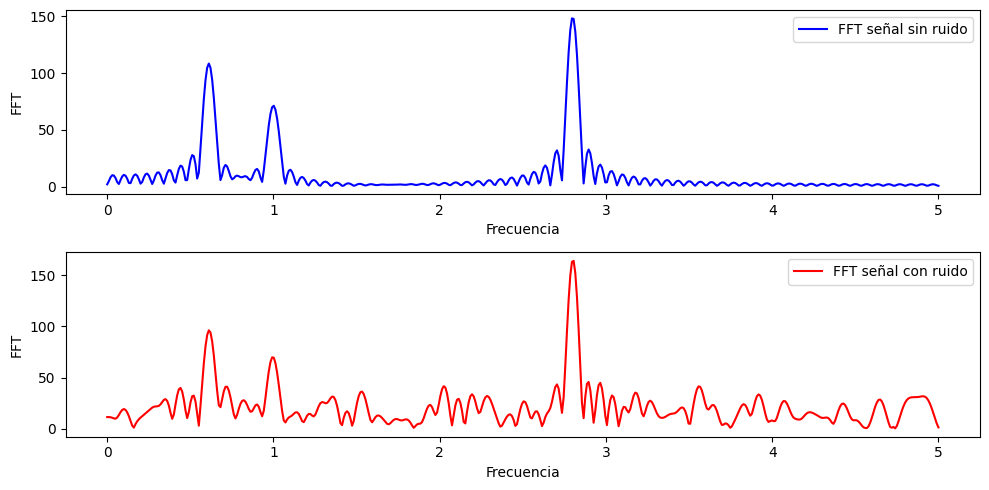

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

ax1.plot(freq,np.abs(FFT),c="b",label="FFT señal sin ruido")
ax1.set_xlabel("Frecuencia")
ax1.set_ylabel("FFT")
ax1.legend()

ax2.plot(freq,np.abs(FFT_ruido),c="r",label="FFT señal con ruido")
ax2.set_xlabel("Frecuencia")
ax2.set_ylabel("FFT")
ax2.legend()

plt.tight_layout()

plt.savefig("1.a.pdf", format="pdf")

In [36]:
print ("1.a) Cuando el valor del ruido es igual o mayor al valor de la amplitud de una las frecuancias no se puede distingir la frecuencia asociada a esa amplitud  ")

1.a) Cuando el valor del ruido es igual o mayor al valor de la amplitud de una las frecuancias no se puede distingir la frecuencia asociada a esa amplitud  


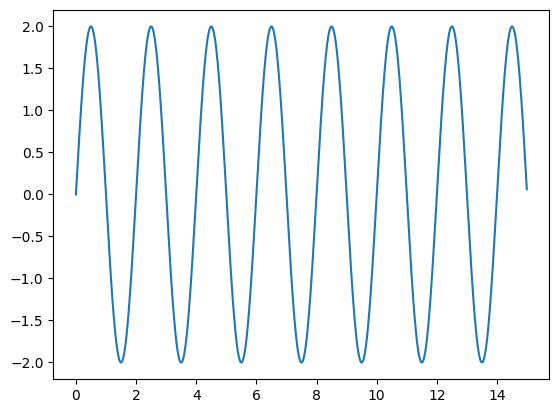

In [45]:
#1.b
#Creamos la señal
señal_fundamental = datos_prueba(15,0.01,[2],[0.5])
ts_fund = señal_fundamental[0]
ys_fund= señal_fundamental[1]

plt.plot(ts_fund,ys_fund)